# Lesson 6 Assignment - Advertising Sales Regression

## Author - Andrew Coogan



### Instructions  
Perform four different linear regressions on advertising sales data located in 'Advertising.csv'.  Your dependent feature is 'sales', a measure of sales of a product in a given market in thousands of dollars. 

The independent features for each of the first 3 separate regressions are:

 1. 'TV': advertising dollars spent on TV ads for a single product in a given market.
 2. 'radio': advertising dollars spent radio ads.
 3. 'newspaper': advertising dollars spent on newspaper ads.

For the first 3 linear regression performed:

- Produce a labeled graph showing the best fit line with the data points.
- Interpret both the slope and y-intercept.
 
The final regression(#4) includes all 3 features: (a) TV, (b) radio, and (c) newspaper. 
- Interpret each partial slope and the intercept parameters.
- Interpret the adjusted R-squared.
- Find and report the mean-squared error.

#### Please prepare this information for a client who may not understand what the parameters mean.


In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import seaborn as sns
%matplotlib inline

In [2]:
# Load data
filename = 'https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/Advertising.csv'
ad_data = pd.read_csv(filename, index_col=0)
print(ad_data.head())
print(ad_data.shape)
ad_data.describe()

      TV  radio  newspaper  sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9
(200, 4)


,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


## Basic Linear Regression

In [3]:
def vanilla_ols_model(formula, data, x, y):
    ols_model = sm.ols(formula = formula, data = data)

    results = ols_model.fit()

    print(results.summary())
    
    y_pred = ols_model.fit().predict(data[x])
    plt.figure(0)
    plt.scatter(data[x], data[y])
    plt.plot(data[x], y_pred, linewidth=2)
    plt.grid(True)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title('{} vs {}'.format(x, y))
    
    plt.figure(1)
    sns.distplot(results.resid, hist=True)
    plt.xlabel('Residual')
    plt.ylabel('Frequency')
    plt.title('Residual Histogram')

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 06 Aug 2018   Prob (F-statistic):           1.47e-42
Time:                        18:06:45   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

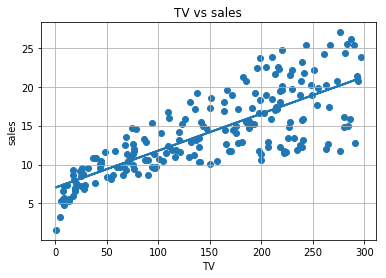

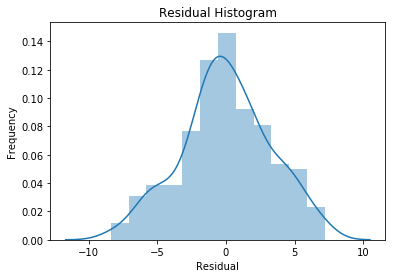

In [4]:
vanilla_ols_model(formula = 'sales ~ TV', data = ad_data, x = 'TV', y = 'sales')

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Mon, 06 Aug 2018   Prob (F-statistic):           4.35e-19
Time:                        18:06:46   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.0

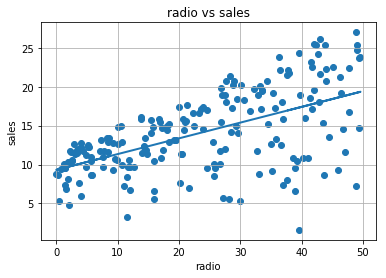

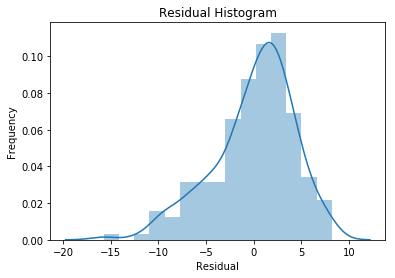

In [5]:
vanilla_ols_model(formula = 'sales ~ radio', data = ad_data, x = 'radio', y = 'sales')

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Mon, 06 Aug 2018   Prob (F-statistic):            0.00115
Time:                        18:06:46   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.0

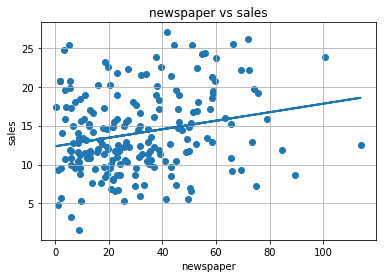

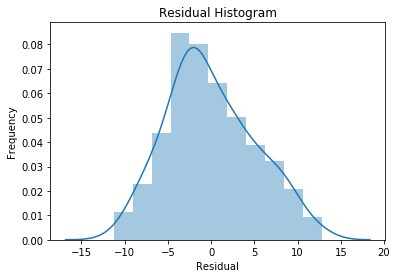

In [6]:
vanilla_ols_model(formula = 'sales ~ newspaper', data = ad_data, x = 'newspaper', y = 'sales')

##  Quick Look
I am going to log the columns to see if we can get better correlations for newspaper and radio.

In [7]:
ad_data["LogTV"] = ad_data.TV.apply(lambda l : np.log(float(l)))
ad_data["LogRadio"] = ad_data.radio.apply(lambda l : np.log(float(l)))
ad_data["LogNewspaper"] = ad_data.newspaper.apply(lambda l : np.log(float(l)))

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     257.2
Date:                Mon, 06 Aug 2018   Prob (F-statistic):           1.21e-37
Time:                        18:06:46   Log-Likelihood:                -530.44
No. Observations:                 200   AIC:                             1065.
Df Residuals:                     198   BIC:                             1071.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.2026      1.162     -3.616      0.0

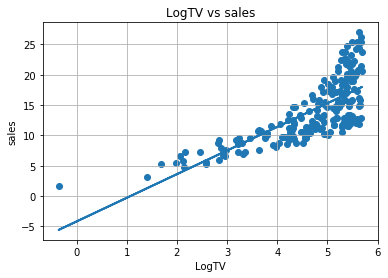

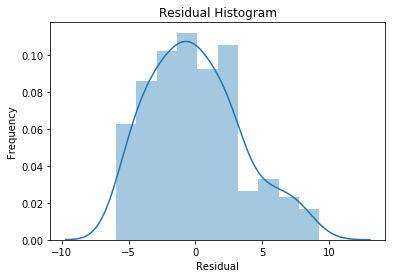

In [8]:
vanilla_ols_model(formula = 'sales ~ LogTV', data = ad_data, x = 'LogTV', y = 'sales')

In [9]:
ad_data.LogRadio.min()
#vanilla_ols_model(formula = 'sales ~ LogRadio', data = ad_data, x = 'LogRadio', y = 'sales')

-inf

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     4.679
Date:                Mon, 06 Aug 2018   Prob (F-statistic):             0.0317
Time:                        18:06:47   Log-Likelihood:                -611.35
No. Observations:                 200   AIC:                             1227.
Df Residuals:                     198   BIC:                             1233.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       11.5160      1.215      9.477   

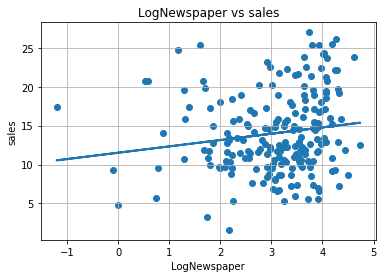

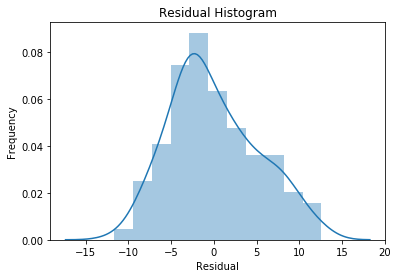

In [10]:
vanilla_ols_model(formula = 'sales ~ LogNewspaper', data = ad_data, x = 'LogNewspaper', y = 'sales')

## Looking at the Log Results
This does not really help at all.  Since Radio has a 0 values for radio values the log breaks apart.  We can remove those rows or hard set the -inf values to a a certain value (like zero).

In [11]:
ad_data.loc[ad_data.LogRadio == -np.inf, "LogRadio"] = 0

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     75.13
Date:                Mon, 06 Aug 2018   Prob (F-statistic):           1.57e-15
Time:                        18:06:47   Log-Likelihood:                -581.52
No. Observations:                 200   AIC:                             1167.
Df Residuals:                     198   BIC:                             1174.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7291      0.898      7.490      0.0

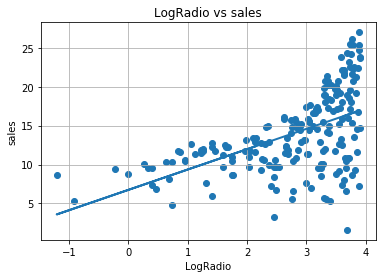

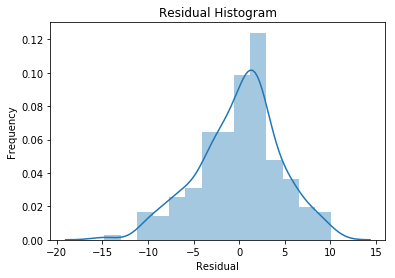

In [12]:
vanilla_ols_model(formula = 'sales ~ LogRadio', data = ad_data, x = 'LogRadio', y = 'sales')

As exepcted this does not help for a stadard OLS regression, but perhaps we can use these log values for other analysis coming up.  Lets look at a few combinations of all three streams and see if we can make some sense of this data!

sales = int + b1*TV + b2*Radio + b3*TV:Radio

Intercept, Slopes : 
Intercept    2.938889
TV           0.045765
radio        0.188530
newspaper   -0.001037
dtype: float64
Intercept t-value, Slope t-values: 
Intercept     9.422288
TV           32.808624
radio        21.893496
newspaper    -0.176715
dtype: float64

Hypothesis test summary for each coefficient if they differ from zero:
Intercept    1.267295e-17
TV           1.509960e-81
radio        1.505339e-54
newspaper    8.599151e-01
dtype: float64

SSE, SST, SSR, and RMSE:
SSE: 4860.323487097813
SST: 5417.14875
SSR: 556.8252629021873
MSE: 1620.1078290326043
RMSE: 40.250563089633964
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 06 Aug 2018   Prob (F-statistic):           1.58e-96
Time:     

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """


Text(0.5,1,'Residual Histogram')

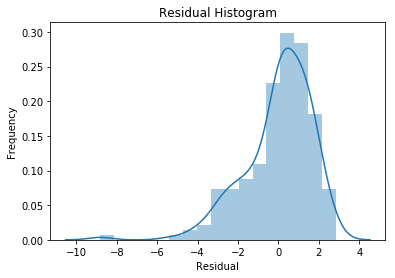

In [13]:
ols_model = sm.ols(formula = 'sales ~ TV + radio + newspaper + 1', data=ad_data)

results = ols_model.fit()
n_points = ad_data.shape[0]
y_output = ad_data['sales'].reshape(n_points, 1)

# Get slope (m) and y-intercept (b)
print('Intercept, Slopes : \n{}'.format(results.params))

# Get the t-values (hypothesis test statistics) for linear regression coefficient hypothesis tests.
print('Intercept t-value, Slope t-values: \n{}'.format(results.tvalues))

# Get p-values for above t-value statistics
print('\nHypothesis test summary for each coefficient if they differ from zero:')
print(results.pvalues)

print('\nSSE, SST, SSR, and RMSE:')
mean_y = np.mean(y_output)
sst = np.sum((y_output - mean_y)**2)
sse = sst - results.ssr
print('SSE: {}'.format(sse))
print('SST: {}'.format(sst))
print('SSR: {}'.format(results.ssr))
print('MSE: {}'.format(results.mse_model))
print('RMSE: {}'.format(np.sqrt(results.mse_model)))

# Get most of the linear regression statistics we are interested in:
print(results.summary())

# Plot a histogram of the residuals
sns.distplot(results.resid, hist=True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Histogram')

## Results
- Interpret each partial slope and the intercept parameters.
    - Intercept is 3, meaning that if there is no investment in advertising then there will be approximately 3 sales.
    - TV is 0.04, which means that for each 20 units spent into TV, there will be one resulting sale.
    - Radio is 0.18, which means that for each (just over) 5 units spent into Radio, there will be approximately one resulting sale.
    - Newspaper is essentially zero, this means that no amount of units spent into newspaper will have an impact on sales.
- Interpret the adjusted R-squared.
    - R-Squared is how much the model matches the underlying data by measuring the residual errors.  An adjusted R-Squared value is simialr to an R-Squared value, but it penalizes based on the number of parameters one uses.  For this run we have an adjusted of 0.896 which means that just about 90% of the model can be attributed to the linear addition of the three components (newspaper + radio + TV) with their propoer slopes labeled above.
- Find and report the mean-squared error.
    - The mean-squared error (MSE above) is 1620.  If we take the sqaure root of this we end up with just about 40 (RMSE).  This is a metric to determine the differences between the model and actual values.  Values are alwayas positive, zero means perfect match (1.00 R-Squared), so lower the better.